In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainfile = '../data/raw/train.csv'
trainfile_processed = '../data/processed/train_1.0.csv'


In [3]:
df_train = pd.read_csv(trainfile)
df_processed= pd.read_csv(trainfile_processed)


In [4]:
df_train.sort_values(['Pclass','Name']).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
460,461,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S


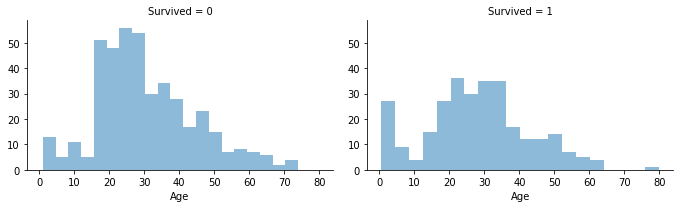

In [5]:
#Plot distribution of survived vs age
g = sns.FacetGrid(df_train, col='Survived', aspect=1.6)
g.map(plt.hist, 'Age',bins=20, alpha=0.5)

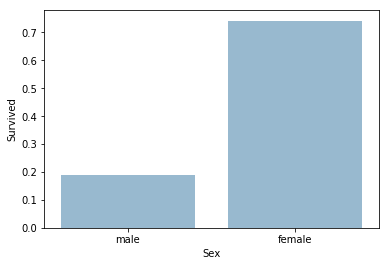

In [6]:
#compare percent survived of male and female passengers
sns.barplot(data=df_train, x='Sex', y='Survived', alpha=0.5, color='tab:blue',ci=None)


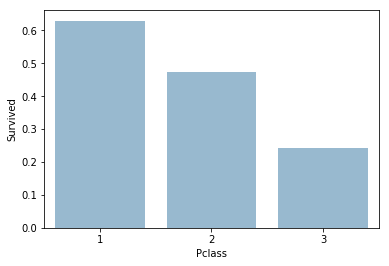

In [7]:
#Compare survival rates across class
sns.barplot(data=df_train, x='Pclass', y='Survived', alpha=0.5, color='tab:blue',ci=None)



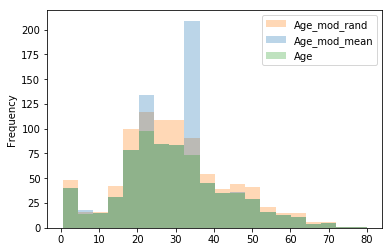

In [8]:
#Compare distributions of ages for different imputation techniques
df_processed['Age_mod_rand'].plot.hist(alpha = 0.3, color='tab:orange',bins=20)
df_processed['Age_mod_mean'].plot.hist(alpha = 0.3, color='tab:blue',bins=20)
df_processed['Age'].plot.hist(alpha = 0.3, color='tab:green',bins=20)
plt.legend(['Age_mod_rand','Age_mod_mean','Age'])

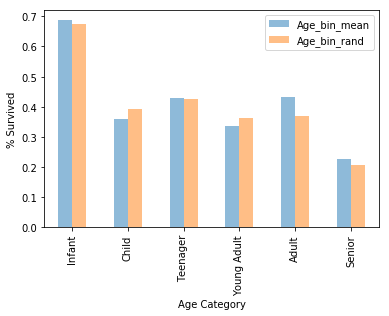

In [11]:
#Compare survival percentage across age groups for different imputation techniques
pivot1 = df_processed.pivot_table(index="Age_bin_mean",values='Survived')
pivot2 = df_processed.pivot_table(index="Age_bin_rand",values='Survived')
pivot_data=pivot1
pivot_data['Age_bin_mean']=pivot1['Survived']
pivot_data['Age_bin_rand']=pivot2['Survived']
pivot_data.index.names = ['Age Category']
pivot_data.drop('Survived',axis=1,inplace=True)
pivot_data = pivot_data.reindex(["Infant","Child","Teenager","Young Adult","Adult","Senior"])

pivot_data.plot.bar(alpha=0.5)
plt.ylabel('% Survived')
plt.show()



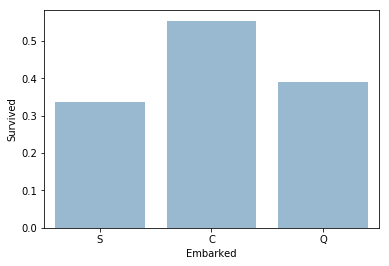

In [12]:
#Compare survival rate for different ports of embarkation 
sns.barplot(data=df_train, x='Embarked', y='Survived', alpha=0.5, color='tab:blue',ci=None)

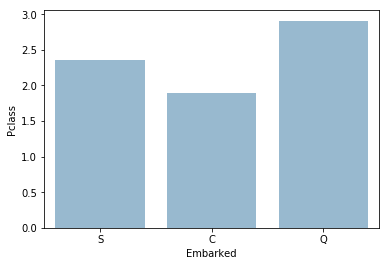

In [13]:
#Compare embarkation to class
sns.barplot(data=df_train, x='Embarked', y='Pclass', alpha=0.5, color='tab:blue',ci=None)

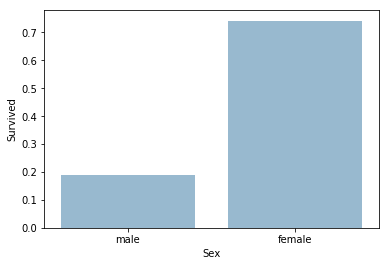

In [14]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



trainfile = '../data/raw/train.csv'

df_train = pd.read_csv(trainfile)


g = sns.FacetGrid(df_train, col='Survived',aspect=1.6)
g.map(plt.hist, 'Age',bins=20, alpha=0.5)
g.savefig('../reports/figures/Age-survived.png') 

plt.close()
g2=sns.barplot(data=df_train, x='Sex', y='Survived', alpha=0.5, color='tab:blue',ci=None)
#plt.savefig('../reports/figures/Sex-survived.png')

